# **Projet de Processus de Poisson :** Thinning Algorithms for Simulating Point Processes

La méthode du **thinning** permet de simplifier la représentation spatiale de données en sélectionnant certains points vérifiant une condition donnée, tout en préservant les caractéristiques importantes de ces données. C'est une généralisation de la méthode d'acceptation/rejet souvent utilisée pour générer des variables aléatoires. La méthode du thinning permet de créer un processus de Poisson non homogène en sélectionnant judicieusement des points à partir d'un processus de Poisson homogène.

In [2]:
#! pip install -U Cython numpy
#! pip install hawkeslib

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as npr
import math
import pandas as pd
from scipy.stats import kstest
import statsmodels.api as sm
#from hawkeslib import UnivariateExpHawkesProcess as UVHP
from datetime import datetime

c:\Users\romai\miniconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\romai\miniconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


## **Processus de comptage et processus ponctuel**

Pour commencer, nous définissons dans cette partie les processus de comptage et les processus ponctuels. En effet, ces deux derniers sont utilisés pour définir les processus de Poissons et de Hawkes, qui nous intéressent dans ce projet.

**Définition:** Le **processus N(t) de comptage** compte le nombre d'événements qui arrivent dans l'intervalle de temps $[0,t]$. Il  est défini par le processus $\{N(t) ; t \geq 0\}$ et vérifie les propriétés suivantes : 
- $\forall t \geq 0$, $N(t)$ est constant par morceaux et à valeurs dans $\mathbb{N}$ ;
- $t \mapsto N(t) \text{ est croissante}$ ;
- $\forall 0<a<b$, $N(b)-N(a)$ représente le nombre d'événements arrivant dans l'intervalle de temps $]a,b]$.


**Définition:** Un **processus ponctuel sur $\mathbb{R}^+$** est un sous-ensemble aléatoire et dénombrable de $\mathbb{R}^+$ où chaque point correspond au moment d'occurance d'événement. Il est aussi défini comme l'intersection entre $\mathbb{R}^+$ et la séquence croissante des temps auxquels les événements se produisent. Cette séquence est aussi appelée comme l'ensemble des temps d'arrivée et notée $0 < T_1 < T_2 < ... < T_n < ...$ avec  $(T_n)_n \in \mathbb{R}^+$ 

**Lien entre processus ponctuel $(T_n)_n$ et processus de comptage $(N_t)_t$:**   
$ \forall n \in \mathbb{N}^+$ et pour tout ($t_1$, $t_2$, ..., $t_n$) dans $\mathbb{R}^+$ : 

$ \{T_1 \leq t_1, T_2 \leq t_2, \ldots, T_n \leq t_n \} = \{ N_{t_1} \geq 1, N_{t_2} \geq 2, \ldots, N_{t_n} \geq n \}$

Il est donc équivalent de définir un processus ponctuel grâce aux temps d'arrivée ou grâce au processus de comptage. On choisira pour la suite de le définir avec $(N_t)_t$.

***Propriété :*** Un processus de ponctuel N est à *accroissements indépendants* si le nombre de points entre intervalles disjoints est indépendant. Autrement dit, $\forall n \in \mathbb{N}^*$, $\forall \quad  0<t_1<t_2<...<t_n$, les variables aléatoires $N_{t_1}-N_0, N_{t_2}-N_{t_1}, ..., N_{t_n}-N_{t_{n-1}}$ sont indépendantes.



***Propriété:*** Un processus ponctuel est à *accroissements stationnaires* si la distribution du nombre de points de tout intervalle de temps dépend uniquement de la longueur de cet intervalle. Autrement dit, $\forall s \geq 0$, le nombre de points dans l'intervalle $(t,s+t]$ soit $N_{t+s}-N_{t}$ a la même distribution $\forall t$.

## **Processus de poisson homogène sur $\mathbb{R}_+$**

Dans cette partie, nous donnons quelques définitions et propriétés des processus de Poisson homogènes avant de les simuler.

**Définition :** Un processus de ponctuel $\{N(t) ; t \geq 0\}$ est appelé processus de Poisson homogène d'intensité $\lambda > 0$ si :
- $N(0) = 0$ ; 
- Le processus est à accroissements indépendants et stationnaires;
- $\mathbb{P}(N_{t+h} - N_t = 1) = \lambda h + o(h)$;
- $\mathbb{P}(N_{t+h} - N_t > 1) = o(h)$.

***Proposition:*** Le nombre de points dans un intervalle de longueur t d'un processus de poisson homogène suit une loi de Poisson de paramètre $\lambda t$. 
$$ \mathbb{P}\{N(t + s) - N(s) = n \} = e^{-\lambda t}\frac{{(\lambda t)^n }}{{n!}}$$

***Proposition:*** Les temps d'arrivée d'un processus de poisson homogène sont distribués suivant une variable aléatoire qui suit une loi exponentielle de paramètre $\lambda$.

***Proposition:***  
$$\mathbb{E}(N_t)=\lambda t \text{, avec } \mathbb{E}(N_t) \text{ l'espérance de } N_t $$ 
$\text{et :}$
$$ Var(N_t)= \lambda t \text { avec } Var(N_t)\text { la variance de } N_t$$

### *Algorithme 1: Simulation d'un processus de Poisson Homogène avec un taux λ sur [0,T]*

Nous allons maitenant simuler un processus de Poisson Homogène de taux $\lambda$ : 

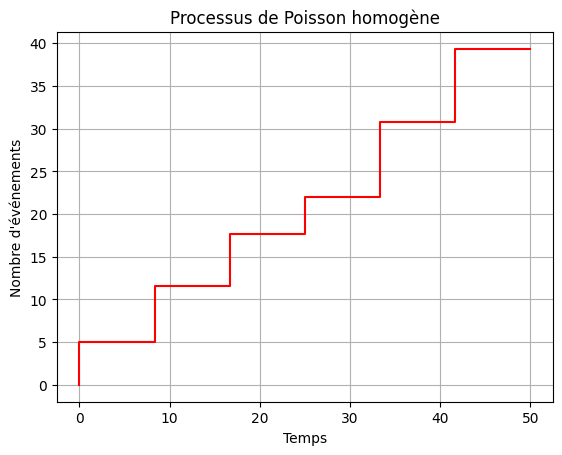

In [2]:
def Process_homogène(lamb,T):
    val=[0]
    t=0
    while True :
        u=npr.uniform(0,1)
        w=-1/lamb * np.log(u)## w~exp(lamb)
        #print(w)
        t=t+w
        #print(times)
        if t > T : 
            return val, len(val)
        else : 
            val.append(t)

#On simule un Poisson Homogène avec notre "Algo 1"
lamb = 0.1
T = 50
P,n= Process_homogène(lamb,T)

times=np.linspace(0,T,n) #création intervalle de temps

#Affichage
plt.step(times, P,color='red')
plt.xlabel('Temps')
plt.ylabel('Nombre d\'événements')
plt.title('Processus de Poisson homogène')
plt.grid(True)
plt.show()

## **Processus de poisson inhomogène sur $\mathbb{R}_+$**

Dans cette partie, nous définissions désormais les processus de Poisson inhomogènes avant d'également les simuler.

**Définition :** Un processus de ponctuel $\{N(t) ; t \geq 0\}$ est appelé processus de Poisson inhomogène avec pour intensité la fonction localement intégrable $\lambda (t) > 0$, $t>0$ si :
- $N(0) = 0$ ; 
- Le processus est à accroissements indépendants et stationnaires;
- $\mathbb{P}(N_{t+h} - N_t = 1) = \lambda(t) h + o(h)$;
- $\mathbb{P}(N_{t+h} - N_t > 1) = o(h)$.

La fonction $\Lambda$ : $t \mapsto \int_{0}^{t} \lambda (s) \,ds $ est appelée l'intensité cumulée du processus de Poisson inhomogène. 

La définition précédente est identique à celle d'un processus de Poisson homogène à la différence que l'intensité n'est maintenant plus constante, mais dépend du temps $t$.

***Proposition :*** Un processus de Poisson inhomogène N d'intensité la fonction $\lambda (t)$ suit une loi de Poisson de paramètre $\int_{0}^{t}\lambda (s) \,ds$ : 

$$\mathbb{P}(N(t)=n) = \frac{\exp^{-\int_{0}^{t}\lambda (s) \,ds} (\int_{0}^{t}\lambda (s) \,ds)^n} {n!} $$

***Proposition:***  $\mathbb{E}(N_t)=Var(N_t)=\Lambda(t)$

### *Algorithme 2: Simulation d'un processus de Poisson Inhomogène avec une fonction intensité $\lambda$ bornée sur [0,T]*

Rajouter une explication
Afin de simuler le processus de Poisson de inhomogène, on réalise l'algorithme du thinning. 
PQ ...

Nous allons présenter l'idée globale de cet algorithme : 
- On simule une intensité $\lambda$ 
- Tout d'abord, nous trouvons le plus petit des majorants, soit ici $\lambda_{max} = sup_t(\lambda (t))$
- On génère des variables alétoires suivant une loi exponentielle de paramètre $\lambda_{max}$, on obtient alors le vecteur des $\tau_i$ tels que $\tau_i \sim \mathcal{E}(\lambda_{max})$
- Dans un même temps, on simule une variable aléatoire $D_i$ pour chaque $\tau_i$ telle que : $D_i \sim \mathcal{U}([0,1])$
- On calcule $D_i\lambda_{max}$ et on impose une condition :  $D_i\lambda_{max} < \lambda(\tau_i)$
- On sélectionne les points $D_i\lambda$ qui sont en dessous de la courbe de $\lambda(t)$, ces points représentent les points dans le Poisson inhomogène.


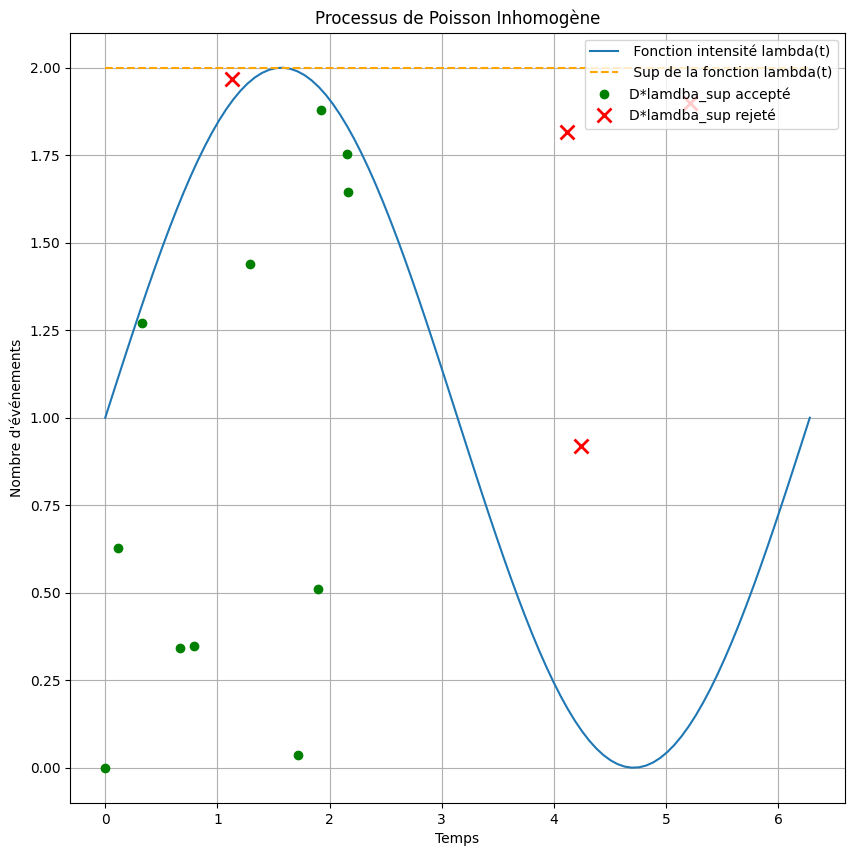

In [63]:
lamb = 0.4
Tmax = 2*np.pi
times=np.linspace(0,Tmax, 10)

#### fonction densité ####
def lambd(t) :
    return 1+np.sin(t)

#### fonction qui calcule le sup ####
def sup(fonction, debut=0, fin=Tmax, pas=0.01):
    t = debut
    sup = fonction(debut)
    while t <= fin: 
        if fonction(t) > sup:
            sup = fonction(t)
        t += pas
    return sup

 
#### fonction qui génère le process ####
def Process_inhomogène(lamb,Tmax):
    T=[0] ; S=[0]
    T_R=[] ; R=[]
    t=0 ; s=0
    lamb_max= sup(lamb)
    
    while s<Tmax :
        u=npr.uniform(0,1)
        w=-math.log(u)/lamb_max    # w~exp(lamb_max)
        s=s+w
        D=npr.uniform(0,1)
        if D <= lamb(s)/lamb_max : #condition d'acception des temps tau par rapport au sup de notre fonction lambda 
            t=s
            T.append(t)            #tau accepté
            S.append(D*lamb_max)   #valeur de D*lamdba_max pour les tau acceptés
        else :
            T_R.append(s)          #tau refusé                                                                                                                             
            R.append(D*lamb_max)   #valeur de D*lamdba_max pour les tau refusés
            t=s                    #pour bien s'assurer qu'on ne dépasse pas tmax même dans ce cas où on incrément pas les tau acceptés 
    if t<=Tmax :
        return T,S,T_R,R
    else : 
        return T[:-1],S[:-1],T_R[:-1],R[:-1] #on renvoie tous les points sauf le dernier élémént qui est supérieur à Tmax
        
                                        
fig = plt.figure(figsize = (10, 10))


x=np.linspace(0,Tmax,100)
#Application de la fonction rate: 
plt.plot(x, lambd(x), label=" Fonction intensité lambda(t)")
plt.hlines(2,0,Tmax, color='orange', linestyle='--', label=" Sup de la fonction lambda(t)")



#Applications de la fonction de simulation/thinning
T,D,T_R,R= Process_inhomogène(lambd,Tmax)

plt.plot(T,D, "o",color='green', label="D*lamdba_sup accepté") #on affiche les intensité D des taus accepté T en point vert
plt.plot(T_R,R, "x",color='red', markersize=10, markeredgewidth=2, label="D*lamdba_sup rejeté") #on affiche les intensité R des taus refusé T_R en croix rouge
plt.xlabel('Temps')
plt.ylabel('Nombre d\'événements')
plt.title('Processus de Poisson Inhomogène')
plt.legend()
plt.grid(True)
plt.show()

## **Processus de Hawkes sur $\mathbb{R}_+$**

Nous allons maitenant nous intéresser aux processus de Hawkes. Dans un premier temps nous allons énoncer des définitions importantes pour comprendre la définition du processus de Hawkes. Enfin, nous simulerons l'algorithme de thinning dans le cas des processus de Hawkes.

***Définition :*** Un processus ponctuel est dit **auto-excitant** si l'intensité λ(.) dépend non seulement de l'instant t, mais aussi de tout le passé du processus ponctuel.

On définit l'entièreté du passé par l'écriture mathématique suivante : 

***Définition :*** Pour tout $N(t)$, la filtration naturelle $F^{N} = (\mathcal{F}_t^N; t\geq0)$ est définie par : 

$$ \mathcal{F}_t^N = σ \{ N(s) ; s \leq t \} $$

Autrement dit, $\mathcal{F}_t^N$ est l'algèbre σ générée par $N$  jusqu'à l'instant $t$, et représente l'histoire interne de $N$ jusqu'à l'instant $t$.

Avec cette définition, nous pouvons définir l'intensité λ(.) pour un processus ponctuel auto-excitant.
Il est plus approprié de l'appeler processus d'intensité, car λ(.) est lui-même un processus aléatoire dont la trajectoire de l'échantillon dépend de la réalisation de $N(.)$. 

***Définition :*** Soit $N(t)$ un processus ponctuel avec un filtrage naturel $\mathcal{F}_t^N$. On appelle la **fonction d'intensité stochastique du processus ponctuel** le processus continu à gauche définit tel que : 
$$ λ(t\vert \mathcal{F}_{t^{-}}^N) = \lim\limits_{h \to 0^+} \frac{P \{N(t+h) - N(t) > 0 \vert \mathcal{F}_{t^{-}}^N \}}{h}$$

La raison de l'utilisation de la continuité à gauche est liée à la prévisibilité : si l'intensité conditionnelle présente une discontinuité en un point du processus, alors sa valeur à ce point doit être définie par l'historique avant le processus.
discontinuité à un point du processus, sa valeur à ce point doit être définie par l'histoire avant ce point, et non par ce qui se passe au point lui-même. 
Le processus de Hawkes présenté ci-dessous est un exemple de processus ponctuel auto-excitatif.

**Définition :** Un processus est dit simple si 
$$ P(N({t}) = 0 \text{ ou } 1 \text{ pour tout } t) = 1 $$


Nous pouvons désormais définir les processus de Hawkes.

**Définition** : (Hawkes, 1971) Un **processus de Hawkes** est un processus ponctuel univariant simple N(t) qui vérifie : 
- N(t) = 0 ;
- λ(t) est processus stochastique continu à gauche, donné par l'intégrale de Stieltjes :
$$ \lambda(t) = \mu + \int_{0}^{t} \alpha \exp(-\beta (t-s)) \, dN(s) = \mu + \sum_{k: t_k < t} \alpha \exp^{-\beta (t-s)} $$
avec $\mu>0$ et $0 < \alpha < \beta$ ;
- λ(t) est l'intensité stochastique du processus de ponctuel telle que :  
$$ P(N(t+h) - N(t) = 1 \,|\, \mathcal{F}_{t^-}^N) = \lambda(t)h + o(h) $$ 
- Le processus de ponctuel est ordonné tel que : 
$$ P(N(t+h) - N(t) \geq 2 \,|\, \mathcal{F}_{t^-}^N) = o(h) $$

Ce processus est dit Hawkes univariant avec une décroissance exponentielle sur $[0,\inf)$.




**Propriété :** 
$$ \mathbb{E}(H_t) = \frac{1}{(\alpha - \beta)} \big( \mu + \frac{\beta \mu}{(\alpha - \beta)} ( \exp((\alpha - \beta)t) - 1) - \beta\mu t\big) $$
avec $\mu>0$ et $0 < \alpha < \beta$ 

Intéressons nous à la preuve de cette propriété : 

$$ \text{Soit } \lambda_t = \mu + \sum_{s<t} \alpha \exp(- \beta (t-s)) \text{ tel que } \Delta_sH = H_s - H_s^- \text{with } H_s \text{ un processus de Hawkes.} $$


On pose également: 
$$ \phi(t-s) = \alpha \exp(- \beta (t-s)) \text{ tel que } \phi(u) = \alpha \exp(- \beta (u))$$

On cherche ici à calculer : 
$$ \mathbb{E} (H_t) = \int_{0}^{t} \mathbb{E}(\lambda_s)ds $$

Il nous faut calculer $\mathbb{E}(\lambda_s)$ en premier lieu.

On pose : $$ f_t = \mathbb{E}(\lambda_t) = \mu + \int_{0}^{t} \phi(t-s)\mathbb{E}(\lambda_s)ds $$
$$ \Leftrightarrow f_t = \mu + \int_{0}^{t} \phi(t-s)f_sds $$

On reconnaît le produit de convolution : $ f*\phi $ .

Or par la méthode des itérations de Picard, on pose la résolvante $\phi$ :
$$  \phi(s)= \sum_{n \leq 1} \phi^{(n)}(u) $$ 
$$ \text{ avec : }  \phi^{(n)} = \int_{0}^{u} \phi(u-s) \phi^{(n-1)} (s)ds \text{ et que : }  \phi^{(0)} = \phi$$ 

Cela nous permet d'obtenir l'expression suivante de $f_t$:
$$ \Leftrightarrow f_t = \mu ( 1 + \int_{0}^{t} \psi(s)f_sds) $$ 
avec $$\lVert \phi \rVert = \int_{0}^{\inf} \phi(u)du < 1 \Leftrightarrow {\lVert \phi \rVert}_1 <1 \Leftrightarrow \alpha < \beta $$ 

D'où : 
$$f_t = \mu + \alpha e^{- \beta t}+ \int_{0}^{t} e^{\beta s}f_sds $$ 

En dérivant, on obtient : 


$$f_t' = - \beta \alpha e^{- \beta t} \int_{0}^{t} e^{\beta s}f_sds + \alpha e^{- \beta t} \alpha e^{\beta t}f_t$$ 
$$ = (- \beta (f_t-\mu) + \alpha f_t ) \text{car } \alpha e^{- \beta t} \int_{0}^{t} e^{\beta s}f_sds = $$
$$ = (\alpha - \beta) f_t + \beta \mu$$

On obtient alors une équation différentielle d'ordre 1 à ce=oefficient constant définie par : 
$$ ft'(\beta- \alpha ) f_t=  \beta \mu$$

Les solutions sont de la forme : 
$$ f_t(t) = C\exp(((\alpha - \beta)t) - \frac{\beta \mu}{(\alpha - \beta)} \text{ avec C une constante.} $$

On peut déterminer cette constante car on sait que $ f_t(0) = \mu $
$$ \text{D'ou : } C = \mu + \frac{\beta \mu}{(\alpha - \beta)} $$

Ainsi, on peut conclure le calcul de l'espérance :
$$ 
\mathbb{E}(H_t) = \int_{0}^{t} \mathbb{E}(\lambda_s) \, ds = \int_{0}^{t} f_s \, ds
$$
$$
= C \exp((\alpha - \beta)t) - \frac{\beta \mu}{(\alpha - \beta)} \, t 
$$
$$
= C \int_{0}^{t} \exp((\alpha - \beta)t) \, dt - \int_{0}^{t} \frac{\beta \mu}{(\alpha - \beta)} \, dt
$$

$$
= C (\frac{\exp((\alpha - \beta)t)}{(\alpha - \beta)}  - \frac{1}{(\alpha - \beta)})- \beta\mu t
$$
En remplaçant par la valeur de $C$, on obtient : 
$$
\mathbb{E}(H_t)= \frac{1}{(\alpha - \beta)} \big[ \mu + \frac{\beta \mu}{(\alpha - \beta)} ( \exp((\alpha - \beta)t) - 1) - \beta\mu t\big]
$$ 

Ainsi, on voit que l'espérance $ \mathbb{E}(H_t)$ est croissante en $t$. En comparant avec l'espérance d'un processus de Poisson on voit qu'en moyenne le processus de Hawkes réalise un petit plus de sauts qu'un processus de Poisson mais c'est de l'ordre d'une constante. 

### Algorithme 3 : Simulation of a Univariate Hawkes Poisson with Exponential Kernel

On souhaite simuler un processus de Hawkes, afin d'avoir un aperçu plus visuel de ce processus aléatoire. 

On réalise l'algorithme suivant, qui ressemble beaucoup à l'algorithme 2 dans son idée générale. Cependant, dans cet algorithme le majorant de $\lambda$ change après chaque $\tau_i$. 

Nous allons présenter, en quelques mots, les étapes principales de l'algorithme : 
- On simule une intensité $\lambda(t) = \mu $
- On trouve le plus petit des majorants, soit ici $\lambda_{max} = \mu$ pour notre première expression de $\lambda$
    - On génère une variable aléatoire suivant une loi exponentielle de paramètre $\lambda_{max}$ tel que $\tau \sim \mathcal{E}(\lambda_{max})$
    - Dans un même temps, on simule une variable aléatoire $D$ pour chaque $\tau$ telle que : $D \sim \mathcal{U}([0,1])$
    - On calcule $D\lambda_{max}$ et on impose une condition :  $D\lambda_{max} < \lambda(\tau)$
    - On sélectionne le point $D_i\lambda$ il est représenté en dessous de la courbe de $\lambda(t)$, soit s'il respecte la condition, on range le $\tau$ associé dans un tableau T.
    - On recalcule alors  $\lambda_{max}$ tel que à $\lambda_{max}=\lambda(\tau)$
    
On réitère ces étapes jusqu'à ce que les valeurs des $\tau$ arrivent au délà d'une certaine valeur appelée $T_{max}$.

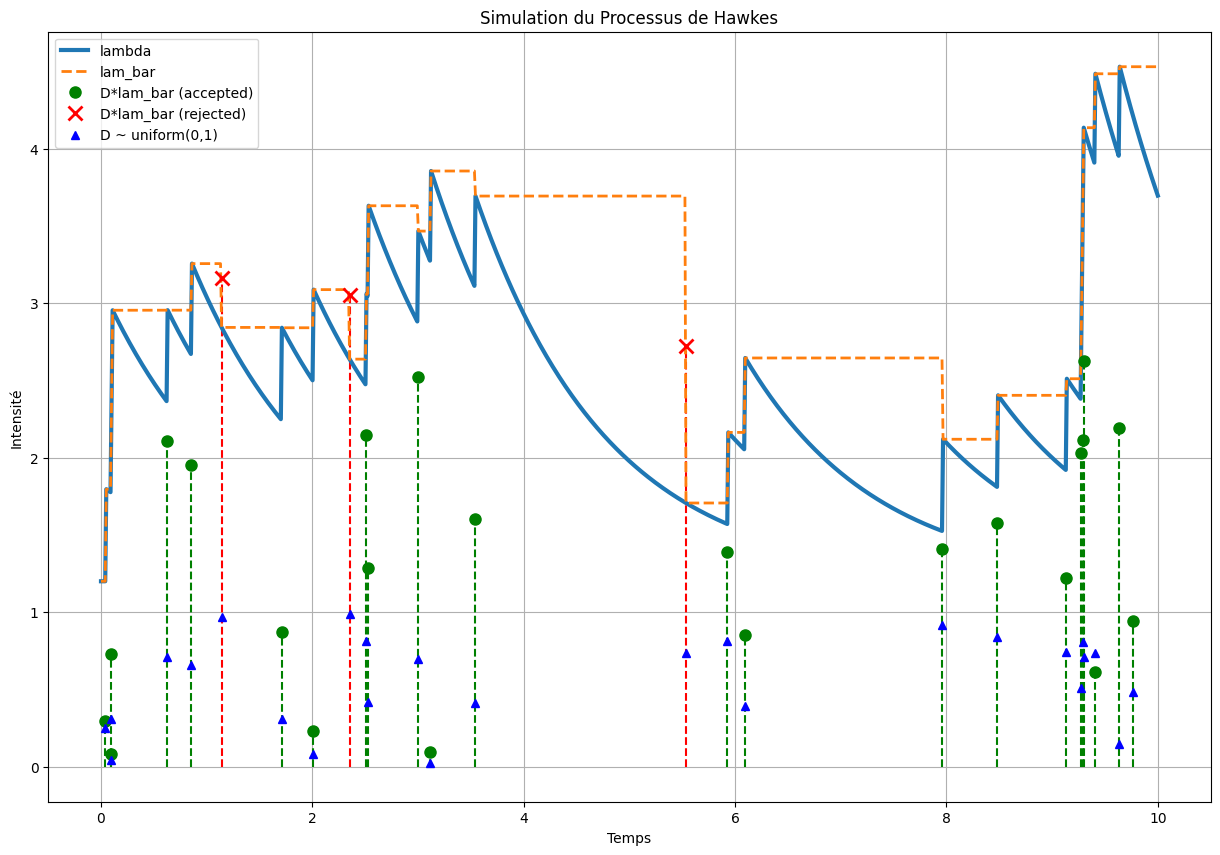

In [54]:
# fonction densité ####
def lam(su,times,mu=1.2,alpha=0.6,beta=0.8) :
    if times == []:
        return mu
    else : 
        return mu + np.sum(alpha * np.exp(-beta * (su - np.array(times))))    


def Hawkes_Process(mu, alpha, beta, Tmax):
    T = []                  # Pour stocker les tau
    S = []                  # Pour stocker le critère d'acceptation du tau
    s = 0                   # Initialisation de s
    T_R = [] ; R = []       # Pour stocker les tau refusé et leur intensité
    I = []                  # Pour stocker les valeurs de la variable aléatoire D suivant une loi uniforme
    while s < Tmax:  # On boucle sur la fenêtre de temps choisie
        if T == []:  # Si jamais on n'a pas encore eu de tau
            lambda_bar = mu  # On fait prendre la valeur du paramètre mu à lamdba_bar
        u = np.random.uniform(0, 1)
        w = -np.log(u)/lambda_bar   # w~exp(lamb_bar)
        s += w                      # On incrémente le pas de temps pour ne pas dépasser Tmax, la limitre de la fenêtre de temps choisie
        D = np.random.uniform(0, 1) # On simule une uniforme sur (0,1)
        I.append(D) 
        l=lam(s,T) 
        if D * lambda_bar <= l: #Si le creitère d'acceptation est validé alors
            t=s
            T.append(t)              # On conserve le tau accepté
            S.append(D*lambda_bar)   # On conserve la valeur de D*lamdba_max pour les tau acceptés
            lambda_bar= mu + alpha * np.sum(np.exp(-beta * (s - np.array(T)))) #on met à jour le lambda_bar, i.e. le sup de lambda
        else :                  
            T_R.append(s)          # On conserve le tau refusé                                                                                                                             
            R.append(D*lambda_bar) # On conserve la valeur de D*lamdba_max pour les tau refusés
            t=s                    # On met à jour la valeur de t pour bien s'assurer qu'on ne dépasse pas Tmax même dans ce cas où on n'incrémente pas les tau acceptés
            lambda_bar= mu + alpha * np.sum(np.exp(-beta * (s - np.array(T)))) #on met à jour le lambda_bar, i.e. le sup de lambda 
    if t<=Tmax :
        return T,S,T_R,R,I
    else :
        return T[:-1],S[:-1],T_R[:-1],R[:-1], I[:-2] #on renvoie tous les points sauf le dernier élémént qui est supérieur à Tmax


# Application de l'algorithme de Thinning d'Ogata : On donne à nos paramètres la valeur indiquée dans le papier d'Ogata
mu = 1.2
alpha = 0.6
beta = 0.8
Tmax = 10
TH,DH,TH_R,RH, D= Hawkes_Process(mu, alpha, beta, Tmax) #On utilise notre algorithme avec ces paramètres

# On veut tracer la fonction d'intensité du processus de Hawkes, lamdba(t):
times=np.linspace(0,Tmax,1000)
l=[] ; sup_l = []; brk2 = []
j=0; count =0
for i in times:
    count +=1
    if j < len(TH)-1:   # Pour s'assurer qu'on ne dépasse pas le nombre de temps de sauts du processus de Hawkes
        if i < TH[0]:   # Tant qu'on a pas eu le 1er saut de temps accepté
            temp = mu   # Notre fonction lamdba reste constante et vaut mu en attendant d'avoir un premier évènement et donc un premier saut de temps
        elif i < TH[j]: # Sinon tant qu'on est entre deux temps de sauts tau on calcule notre lamdba
            temp = mu + np.sum(alpha * np.exp(-beta * (i - np.array(TH[:j]))))
        else :          # Dans le cas où on a dépassé un temps de sauts
            brk2.append(count-1) # On stocke l'indice de temps de sauts pour s'en servir pour l'affichage du sup de lambda donc de lamdba_bar
            j=j+1                # On passe à temps de sauts suivants
            temp = mu + np.sum(alpha * np.exp(-beta * (i - np.array(TH[:j]))))
        l.append(temp)
    else: #Une fois qu'on a dépassé le dernier temps de sauts, on prend la dernière valeur du temps de sauts et on calcule lambda jusqu'à la fin de la fenêtre de temps
        temp = mu + np.sum(alpha * np.exp(-beta * (i - np.array(TH[:-1]))))
        l.append(temp)


        
# On veut tracer le sup de la fonction lambda(t) précédente, lamdba_bar:
brk=[] # Pour stocker les temps où l'on doit recalculer le sup de lamdba
b=0
j=0
i=0

brk_rejete = [int(x*100) for x in TH_R] # On récupère les temps tau des points rejeté. On multiple par 100 car on a 1000 points sur l'intervalle [0,Tmax=10] donc on multiple par 100 pour arriver à [0,1000] 
#print(brk_rejete)
#print(brk2)
brk=brk2+brk_rejete # On concatène la liste des tau acceptés et celle des tau rejetés
brk=sorted(brk)     # On la trie par ordre croissant

for j in range(len(brk)): # On parcourt la liste des temps tau acceptés comme refusé
    while i < brk[j]:     # Tant qu'on est entre deux temps de saut on garde le même sup
        sup_l.append(max(l[b:brk[j]])) # On prend le max de lamdba sur l'intervalle du dernier temps de saut au prochain 
        i+=1
    b=brk[j]    # On actualise le dernier temps de saut, tau
while i < len(l): # Quand on a dépassé le dernier temps de saut tau, on boucle jusqu'au dernier point de lamdba
    sup_l.append(max(l[brk[-1]:len(l)-1])) # On calcule le sup sur ce dernier intervalle
    i+=1


fig = plt.figure(figsize = (15, 10))

#On veut afficher des lignes verticales à chaque tau acceptés et refusé
count=0
for i in TH: # On parcourt la liste des taus accepté
    if count < len(DH):
        plt.plot([i, i], [0, DH[count]], 'g--') #on trace une ligne en pointillée verte verticale partant du point (x=tau accepté, y=0), jusqu'au point (x=tau accepté, y=D*lamdba_bar) 
        count+=1
    #plt.axvline(x=i, linestyle='--', color='green', linewidth=1)
count=0
for j in TH_R:  # On parcourt la liste des taus refusé
    if count < len(RH):
        plt.plot([j, j], [0, RH[count]], 'r--') #on trace une ligne en pointillée rouge verticale partant du point (x=tau refusé, y=0), jusqu'au point (x=tau refusé, y=D*lamdba_bar) 
        count+=1
    #plt.axvline(x=j, linestyle='--', color='red', linewidth=1)

plt.plot(times, l,label="lambda", linewidth=3)                        # On affiche la fonction d'intensité du Processus de Hawkes lamdba en bleu
plt.plot(times, sup_l, linestyle='--', label="lam_bar",linewidth=2)   # On affiche le sup de lamdba ci-dessus en pointillé orange

plt.plot(TH,DH, "o",color='green', markersize=8, label="D*lam_bar (accepted)")                        # On affiche le critère d'acceptation des tau accepté, représenté part un cercle vert
plt.plot(TH_R,RH, "x",color='red', markersize=10, markeredgewidth=2, label="D*lam_bar (rejected)")    # On affiche le critère d'acceptation des tau refusé, représenté part une croix rouge
TH2=TH+TH_R
TH2=sorted(TH2)

plt.plot(TH2, D,"^",color='blue', markersize=6, label="D ~ uniform(0,1)")       # On affiche la variable aléatoire D suivant une uniforme(0,1) qui a été utilisé pour le calcul du critère d'acceptation
plt.xlabel('Temps')
plt.ylabel('Intensité')
plt.title('Simulation du Processus de Hawkes')
plt.legend()
plt.grid(True)
plt.show()

## **Cas pratique : Application de l'algo de Hawkes aux données financières du CAC40**

Expliquer le contexte 

In [65]:
#Chargement des données
CAC40_1an = pd.read_csv('^FCHI_1an.csv')
CAC40_2an = pd.read_csv('^FCHI_2ans.csv')
CAC40_5an = pd.read_csv('^FCHI_5ans.csv')
display(CAC40_1an)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-05-15,7443.379883,7455.629883,7397.859863,7418.209961,7418.209961,48638700
1,2023-05-16,7394.850098,7427.569824,7377.810059,7406.009766,7406.009766,61261800
2,2023-05-17,7378.830078,7422.580078,7354.540039,7399.439941,7399.439941,57783800
3,2023-05-18,7440.750000,7481.779785,7426.390137,7446.890137,7446.890137,59991600
4,2023-05-19,7469.779785,7523.560059,7463.959961,7491.959961,7491.959961,67973200
...,...,...,...,...,...,...,...
251,2024-05-08,8093.620117,8157.479980,8089.279785,8131.410156,8131.410156,53988400
252,2024-05-09,8123.919922,8191.919922,8114.879883,8187.649902,8187.649902,39071500
253,2024-05-10,8232.650391,8259.190430,8211.200195,8219.139648,8219.139648,57091000
254,2024-05-13,8211.070313,8223.809570,8186.770020,8209.280273,8209.280273,48113100


In [7]:
## regarder date d'ouverture marché et de fermeture 
## abs(close-open) / close > seuil (1%) #le rendement permet d'avoir une mesure à peu près homogène
## on compte le nombre de fois où ça arrive et a chaque fois que ca arrive on le stocke
## faire repartition dans le vecteur temps avec histogramme  et le vecteur est censé représenté une loi exponentielle

### Processus de Comptage

On regarde la valeur de l'indice du CAC40 à l'ouverture et à la fermeture du marché. On réalise un calcul de rendement comme suit : $$ \frac{\vert close-open \vert}{close} $$ et l'on veut savoir quand est-ce qu'il dépasse un seuil arbitraire *(ici entre 1 et 2%, en effet pour le jeu de données sur 5 ans, nous avons décidé de prendre un seuil plus élevé pour réduire le nombre de dépassement de seuil)*.

Ensuite, on veut compter le nombre de fois où le rendement dépasse ce seuil dans notre plage de temps et on stocke les temps de dépassement. Cela nous donne le processus de comptage ci-dessous :

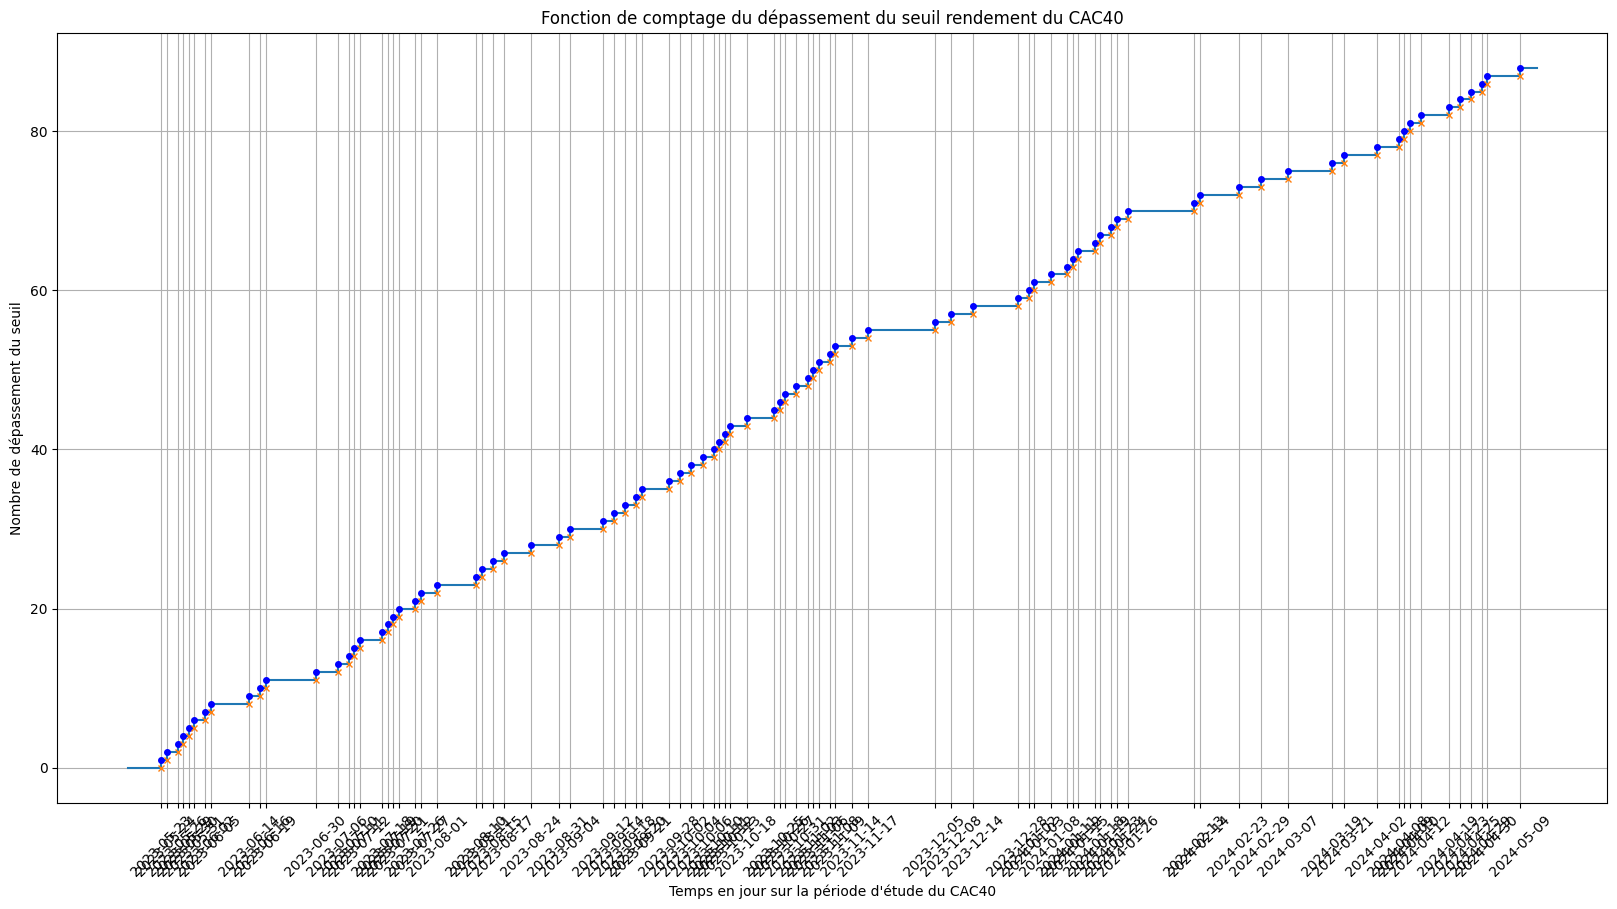

Temps de sauts 1 an: [8.0, 9.0, 11.0, 14.0, 15.0, 16.0, 18.0, 21.0, 30.0, 32.0]
---------------
Temps de sauts 2 ans: [7.0, 8.0, 12.0, 13.0, 20.0, 22.0, 25.0, 26.0, 28.0, 36.0]
---------------
Temps de sauts 5 ans: [33.0, 90.0, 139.0, 200.04166666666424, 285.04166666666424, 294.04166666666424, 295.04166666666424, 298.04166666666424, 299.04166666666424, 300.04166666666424]


In [126]:
# Fonction pour convertir une date en float
def date_to_float(date_str):
    # On convertit la chaîne de caractères en objet datetime
    date_obj = datetime.strptime(date_str, '%Y-%m-%d')
    # On convertit ensuite la date en temps en secondes (selon le package le temps en seconde est conmpté depuis l'époque Unix)
    timestamp = date_obj.timestamp()
    # On divise ensuite par le nombre de secondes par jour, car notre échelle dd temps est en jour
    return (timestamp / (24 * 3600))

def compt(seuil,CAC40):
    #display(CAC40.iloc[:,1])  # Pour afficher la 2eme colonne du dataframe CAC40 
    ferme = CAC40.iloc[:,4]    # On récupère les valeurs à la fermeture
    ouvert = CAC40.iloc[:,1]   # On récupère les valeurs à l'ouverture
    date = CAC40.iloc[:,0]     # On récupère toutes les dates auxquels on a des données

    T=[]     # Pour stocker les temps des dépassements du seuil                  
    Val=[]   # Pour stocker les valeurs du rendement lors des dépassements du seuil
    ind_seuil=[] ; ind_1=[]; ind_2=[] # Pour stocker les index de dépassement du seuil pour l'affichage du processus de comptage
    ind=0
    for i in range(len(CAC40)): 
        rendement = np.abs(ferme[i] - ouvert[i]) / ferme[i] # On calcule le rendement
        if rendement > seuil :  # Si le rendement dépasse le seuil
            T.append(date[i])   # On stocke la date de dépassement de seuil  
            Val.append(np.abs(ferme[i] - ouvert[i]) / ferme[i]) # On stocke également la valeur du taux
            ind+=1
            ind_seuil.append(ind)
            ind_1.append(ind)
            ind_2.append(ind-1)
        else :
            ind_seuil.append(ind)
    
    float_dates = [date_to_float(date) for date in T] # On utilise notre donction ci-dessyus pour convertir nos dates stockés en texte en nombre float exploitables
    for i in range(len(float_dates)):
        float_dates[i] = float_dates[i] - date_to_float(date[0]) # On normalise pour pouvoir mieux manipuler les temps de sauts

    return date,T,ind_1,ind_2,ind_seuil,float_dates
        
# On applique la fonction pour chaque jeu de données
days,T,ind_1,ind_2,ind_seuil,TH_1an=compt(seuil=0.005,CAC40=CAC40_1an) # Pour 1 an
#days,T,ind_1,ind_2,ind_seuil,TH_2an=compt(seuil=0.01,CAC40=CAC40_2an) # Pour 2 ans
#days,T,ind_1,ind_2,ind_seuil,TH_5an=compt(seuil=0.02,CAC40=CAC40_5an) # Pour 5 ans


fig, ax = plt.subplots(figsize = (20, 10))
plt.plot(days, ind_seuil, drawstyle='steps-post')    # On affiche le processus de comptage en effectuant des temps de sauts à chaque dépassement du seuil 
plt.plot(T, ind_1, "o", color="blue", markersize=4)  # On affiche un point pour représenter la gauche de la fonction escalier  du comptage 
plt.plot(T, ind_2, "x", markersize=4, label='T')     # On affiche une croix orange pour représenter la droite de la fonction escalier du comptage 
#print(T)
plt.xlabel('Temps en jour sur la période d\'étude du CAC40')
ax.set_xticks(T) # Pour afficher les dates de dépassement du seuil en abscisse
ax.set_xticklabels(T, rotation=45) # Pour afficher les données en abscisses penché pour une meilleur lisibilité
plt.ylabel('Nombre de dépassement du seuil')
plt.title('Fonction de comptage du dépassement du seuil rendement du CAC40')
plt.grid(True)
plt.show()

print("Temps de sauts 1 an:",TH_1an[0:10])
print("---------------")
print("Temps de sauts 2 ans:",TH_2an[0:10])
print("---------------")
print("Temps de sauts 5 ans:",TH_5an[0:10])

### Découverte du package **Hawkeslib**

On veut désormais essayer de trouver si un processus que nous connaissons déjà, c'est-à-dire par exemple un de Poisson Homogène ou un Hawkes, peut être utilisé pour simuler le dépassement de seuil du rendement journalier du CAC40. Pour cela, nous utiliserons la librairie python *Haweslib*, à laquelle on fournira nos temps de sauts et grâce à cette librairie, et à sa fonction *'get_params'*, nous obtiendrons des estimations pour les valeurs des paramètres $\mu$, $\alpha$ et $\beta$, définit ci-dessus dans la partie sur les processus de Hawkes. Ainsi pour savoir comment interpréter les valeurs de ces paramètres, la librairie étant nouvelle pournous, nous allons essayer de lui donner des processus que nous avons déjà manipulé au préalable pour pouvoir analyser le résultat sur notr jeu de données pour lequel nous n'avons actuellement aucune idée d'éventuels paramètres.

#### **Hawkeslib** pour un Poisson Homogène

On essaye de voir quels paramètres nous renvoie la librairie *Hawkeslib* quand on lui donne un processus de poisson homogène d'intensité constante $\lambda_{poiss} (t) = 0.1$.

In [96]:
# On simule un Poisson Homogène avec notre "Algo 1"
lamb = 0.1 # On prend un lamdba de 0.1
T = 50
P,n= Process_homogène(lamb,T)

In [94]:
from hawkeslib import UnivariateExpHawkesProcess as UVHP
uv = UVHP()
uv.fit(np.array(P))

ModuleNotFoundError: No module named 'hawkeslib'

In [95]:
# vOn récupère les paramètres que la librairie nous estime
mu, alpha, beta = uv.get_params()

N_approx = mu * P[-1] / (1 - alpha) #on affiche le nombre de temps de sauts approximés en se basant sur les paramètres que la librairie nous a estimé

print("Nombre de temps de sauts approximé:",N_approx)
print("Nombre de temps de sauts réel :", len(P))
print("alpha:",alpha)
print("mu:",mu)
print("beta:",beta)

NameError: name 'uv' is not defined

**Interprétation :** 
- On remarque qu'$\alpha$ est proche de 0, or on sait qu'$\alpha$ représente la taille des sauts d'intensité à chaque nouvel évèmenent. Ainsi si on a $\alpha$ proche de 0, cela veut dire qu'à chaque nouvel évènement la fonction d'intensité $\lambda(t)$ n'augmente pas beaucoup, or comme elle décroit exponentiellement juste après, si la taille des sauts d'intensité est petite, la fonction $\lambda(t)$ est presque constante, comme celle d'un processus de Poisson Homogène.

- De plus le paramètre $\mu$ tend bien vers notre $\lambda$ paramètre initial du Porcessus de Poisson. Or, avec l'information ci-dessus qu'$\alpha$ est proche de 0, donc que notre fonction $\lambda(t)$ est quasi constante, on peut affirmer que $\lambda(t)=\mu$, ainsi $\lambda(t)=\lambda_{poiss} $ le paramètre du Processus de Poisson Homogène.

- Enfin on a bien une estimation du nombre de temps de sauts correcte.

Ainsi, si l'on donne un Procces de Poisson Homogène à l'algorithme d'estimation de paramètres d'hawkeslib on obtient un $\alpha$ proche de 0 et un $\mu$ proche du paramètre $\lambda_{poiss}$ du Poisson Homogène.

#### **Hawkeslib** pour un Hawkes

On essaye de voir quels paramètres nous renvoie la librairie *Hawkeslib* quand on lui donne un process de Hawkes de paramètres :  $\mu = 1.2$, $\alpha = 0.6$ et $\beta = 0.8$

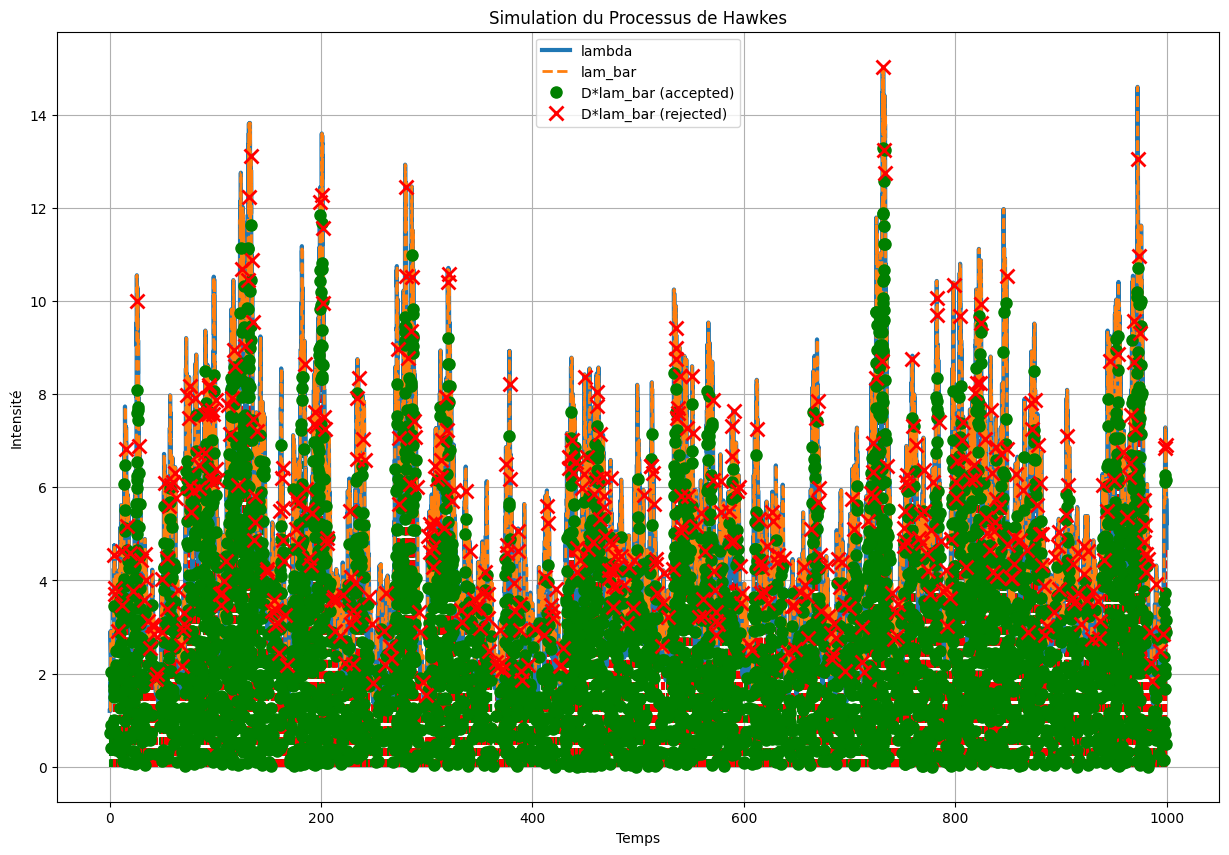

In [107]:
# On reprend notre algorithme d'Ogata définit plus haut ainsi que tous les paramètres d'affichage  avec juste une modification avec Tmax=1000
Tmax = 1000 # On change juste le temps maximum, en effet lors de tests l'on a remarque que plus Tmax était grand, meilleur était l'approximation des paramètres

mu = 1.2
alpha = 0.6
beta = 0.8
TH,DH,TH_R,RH, D= Hawkes_Process(mu, alpha, beta, Tmax) #On utilise notre algorithme avec ces paramètres

# On veut tracer la fonction d'intensité du processus de Hawkes, lamdba(t):
times=np.linspace(0,Tmax,Tmax*100)
l=[] ; sup_l = []; brk2 = []
j=0; count =0
for i in times:
    count +=1
    if j < len(TH)-1:   # Pour s'assurer qu'on ne dépasse pas le nombre de temps de sauts du processus de Hawkes
        if i < TH[0]:   # Tant qu'on a pas eu le 1er saut de temps accepté
            temp = mu   # Notre fonction lamdba reste constante et vaut mu en attendant d'avoir un premier évènement et donc un premier saut de temps
        elif i < TH[j]: # Sinon tant qu'on est entre deux temps de sauts tau on calcule notre lamdba
            temp = mu + np.sum(alpha * np.exp(-beta * (i - np.array(TH[:j]))))
        else :          # Dans le cas où on a dépassé un temps de sauts
            brk2.append(count-1) # On stocke l'indice de temps de sauts pour s'en servir pour l'affichage du sup de lambda donc de lamdba_bar
            j=j+1                # On passe à temps de sauts suivants
            temp = mu + np.sum(alpha * np.exp(-beta * (i - np.array(TH[:j]))))
        l.append(temp)
    else: #Une fois qu'on a dépassé le dernier temps de sauts, on prend la dernière valeur du temps de sauts et on calcule lambda jusqu'à la fin de la fenêtre de temps
        temp = mu + np.sum(alpha * np.exp(-beta * (i - np.array(TH[:-1]))))
        l.append(temp)


        
# On veut tracer le sup de la fonction lambda(t) précédente, lamdba_bar:
brk=[] # Pour stocker les temps où l'on doit recalculer le sup de lamdba
b=0
j=0
i=0

brk_rejete = [int(x*100) for x in TH_R] # On récupère les temps tau des points rejeté. On multiple par 100 car on a 1000 points sur l'intervalle [0,Tmax=10] donc on multiple par 100 pour arriver à [0,1000] 
#print(brk_rejete)
#print(brk2)
brk=brk2+brk_rejete # On concatène la liste des tau acceptés et celle des tau rejetés
brk=sorted(brk)     # On la trie par ordre croissant

for j in range(len(brk)): # On parcourt la liste des temps tau acceptés comme refusé
    while i < brk[j]:     # Tant qu'on est entre deux temps de saut on garde le même sup
        sup_l.append(max(l[b:brk[j]])) # On prend le max de lamdba sur l'intervalle du dernier temps de saut au prochain 
        i+=1
    b=brk[j]    # On actualise le dernier temps de saut, tau
while i < len(l): # Quand on a dépassé le dernier temps de saut tau, on boucle jusqu'au dernier point de lamdba
    sup_l.append(max(l[brk[-1]:len(l)-1])) # On calcule le sup sur ce dernier intervalle
    i+=1


fig = plt.figure(figsize = (15, 10))

#On veut afficher des lignes verticales à chaque tau acceptés et refusé
count=0
for i in TH: # On parcourt la liste des taus accepté
    if count < len(DH):
        plt.plot([i, i], [0, DH[count]], 'g--') #on trace une ligne en pointillée verte verticale partant du point (x=tau accepté, y=0), jusqu'au point (x=tau accepté, y=D*lamdba_bar) 
        count+=1
    #plt.axvline(x=i, linestyle='--', color='green', linewidth=1)
count=0
for j in TH_R:  # On parcourt la liste des taus refusé
    if count < len(RH):
        plt.plot([j, j], [0, RH[count]], 'r--') #on trace une ligne en pointillée rouge verticale partant du point (x=tau refusé, y=0), jusqu'au point (x=tau refusé, y=D*lamdba_bar) 
        count+=1
    #plt.axvline(x=j, linestyle='--', color='red', linewidth=1)

plt.plot(times, l,label="lambda", linewidth=3)                        # On affiche la fonction d'intensité du Processus de Hawkes lamdba en bleu
plt.plot(times, sup_l, linestyle='--', label="lam_bar",linewidth=2)   # On affiche le sup de lamdba ci-dessus en pointillé orange

plt.plot(TH,DH, "o",color='green', markersize=8, label="D*lam_bar (accepted)")                        # On affiche le critère d'acceptation des tau accepté, représenté part un cercle vert
plt.plot(TH_R,RH, "x",color='red', markersize=10, markeredgewidth=2, label="D*lam_bar (rejected)")    # On affiche le critère d'acceptation des tau refusé, représenté part une croix rouge
#TH2=TH+TH_R
#TH2=sorted(TH2)

#plt.plot(TH2, D,"^",color='blue', markersize=6, label="D ~ uniform(0,1)")       # On affiche la variable aléatoire D suivant une uniforme(0,1) qui a été utilisé pour le calcul du critère d'acceptation
plt.xlabel('Temps')
plt.ylabel('Intensité')
plt.title('Simulation du Processus de Hawkes')
plt.legend()
plt.grid(True)
plt.show()

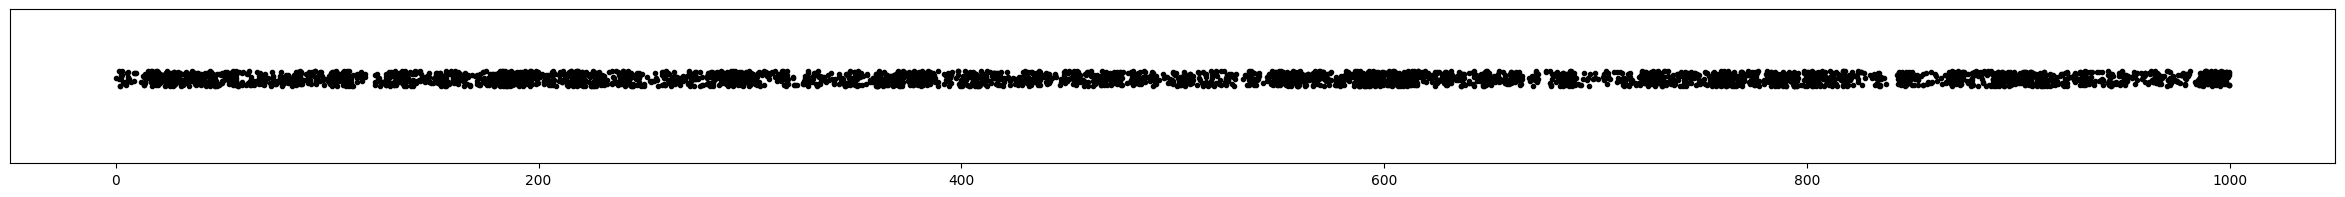

In [105]:
plt.figure(figsize=(30,2))
plt.ylim([-5, 5])
plt.yticks([])
_ = plt.plot(TH, np.random.rand(len(TH)), 'k.')

In [100]:
uv2 = UVHP()
#uv2.set_params(1.2,0.6,0.8)
uv2.fit(np.array(TH))
print(TH[-1])

NameError: name 'UVHP' is not defined

In [ ]:
# verify that the unconditional mean makes sense
mu, alpha, beta = uv2.get_params()

N_approx = mu * TH[-1] / (1 - alpha)

print(N_approx)
print(len(TH))
print("alpha:",alpha)
print("mu:",mu)
print("beta:",beta)

4403.338180360464
4396
alpha: 0.7333665293456629
mu: 1.1754697446168267
beta: 0.9515931744099619


**Interprétation :** 
- On remarque en faisant varier Tmax, que plus il est grand, plus l'on a d'évènements donc de temps de sauts, meilleur est l'estimation de nos paramètres, ici on pose $T_{max}=1000$.

- On remarque donc qu'on approche bien les valeurs connues d'$\alpha$, de $\mu$, et de $\beta$, en donnant ce processus de Hawkes à la librairie *hawkeslib*.

Ainsi si l'on donne un processus de Hawkes pour lequel on veut estimer les paramètres, si l'on fait en sorte d'avoir un grand nombre de temps de sauts et donc d'évènements, on peut approximativement bien retrouver nos paramètres de départ.

### Retour sur notre processus de comptage issu des données CAC40 - Modélisation

Après s'être familiarisé un peu avec la librairie *hawkeslib*, nous revenons à notre jeu de données du CAC40.

In [128]:
#On charge les temps de sauts tau sur les 3 jeu de données sur un, deux et cinqs années.
days,T,ind_1,ind_2,ind_seuil,TH_1an=compt(seuil=0.005,CAC40=CAC40_1an)
days,T,ind_1,ind_2,ind_seuil,TH_2an=compt(seuil=0.01,CAC40=CAC40_2an)
days,T,ind_1,ind_2,ind_seuil,TH_5an=compt(seuil=0.02,CAC40=CAC40_5an)

TH_CAC40=TH_1an

#### **Test de Kolmogorov Smirnoff Lilifors** - Modélisation par un Processus de Poisson Homogène
On intuite que l'on a probablement pas un processus de Poisson Homogène, en effet les évènements, donc les dépassement de seuils semblent être liés à une fonction d'intensité non constante. De plus, on pourrait penser retouver un phénomène d'emballement et de répliques après l'occurence d'un évènement, ce qui pourrait nous faire plus penser à un Hawkes. Mais l'on veut s'en assurer en testant, en premier lieu, s'il existe un paramètre $\lambda_{poiss}$ tel que le processus de comptage du CAC40 puisse être modélisé par un processus de Poisson Homogène de paramètre $\lambda_{poiss}$. 

Pour ce faire, on veut tester si les inter-sauts suivent une loi exponentielle. Cependant, nous ne connaissons pas le paramètre de cet éventuelle loi exponentielle, ainsi il nous faut réaliser un test d'ajustement de Kolmogorov-Smirnoff corrigé par Lilifors sur ces inter-sauts. 

Pour interpréter ce test, nous savons qu'une p-valeur inférieure à 5% nous indiquerait qu'on rejette à 95% l'hypothèse disant que les inter-sauts suivent une loi exponentielle. Ainsi, on pourrait confirmer notre intuition, en disant que notre processus n'est pas un processus de Poisson Homogène.

In [130]:
inter_saut=[] 
for i in range(0,len(TH_CAC40)-1):
    inter_saut.append(TH_CAC40[i+1]-TH_CAC40[i]) # On soustrait chaque temps tau avec celui le suivant pour avoir le temps entre deux sauts 
#print(inter_saut)

#Test d'ajustement de Kolmogorov Smirnoff Lilifors
ksstat, pvalue = sm.stats.diagnostic.lilliefors(inter_saut,"exp",'approx')
print("La stat de test est :",ksstat)
print("La p_value du test est ", pvalue)

alpha=0.05
if pvalue > alpha:
    result = 'Inter-Saut Exponentiel => Processus de Poisson Homogène'
else:
    result = 'Inter-Saut non-Exponentiel => Pas un Processus de Poisson Homogène'
print(f'Lilliefors: {result:>21s}')

La stat de test est : 0.21898356896690632
La p_value du test est  0.0009999999999998899
Lilliefors: Inter-Saut non-Exponentiel => Pas un Processus de Poisson Homogène


#### **Estimation des paramètres avec Hawkeslib** - Modélisation par un Proccesus de Hawkes

Après avoir effectué un test de Kolmogorov Smirnoff corrigé par Lilifors, nous pouvons en déduire que notre fonction de comptage ne peut pas être modélisée par un processus de Poisson Homogène. Nous nous intéressons donc désormais au processus de Hawkes, processus qui pourrait convenir et expliquer cette impression d'emballement que l'in croit retrouver lors de l'analyse visuelle des graphqiues du processus de comptage.

Pour cela, nous allons donc donner les temps de sauts à la librairie *hawkeslib* et essayer d'interpréter ces résultats après s'y être quelques peu familiarisé plus haut dans le notebook.

In [18]:
uv3 = UVHP()
uv3.fit(np.array(TH_CAC40))

-759.0194965251012

In [29]:
# On récupère les paramètres estimée du Hawkes
mu, alpha, beta = uv3.get_params()

N_approx = mu * TH_CAC40[-1] / (1 - alpha) #pour vérifier que cela fait sens on estime le nombre de temps sauts approximatifs

print("Nombre de temps de sauts approximé:",N_approx)
print("Nombre de temps de sauts réel :", len(TH_CAC40))
print("mu:",mu)
print("alpha:",alpha)
print("beta:",beta)

Nombre de temps de sauts approximé: 273.0778664360279
Nombre de temps de sauts réel : 271
mu: 0.05976357638192365
alpha: 0.6036594315013133
beta: 0.06221816960414009


mu: 0.05976357638192365
alpha: 0.6036594315013133
beta: 0.06221816960414009


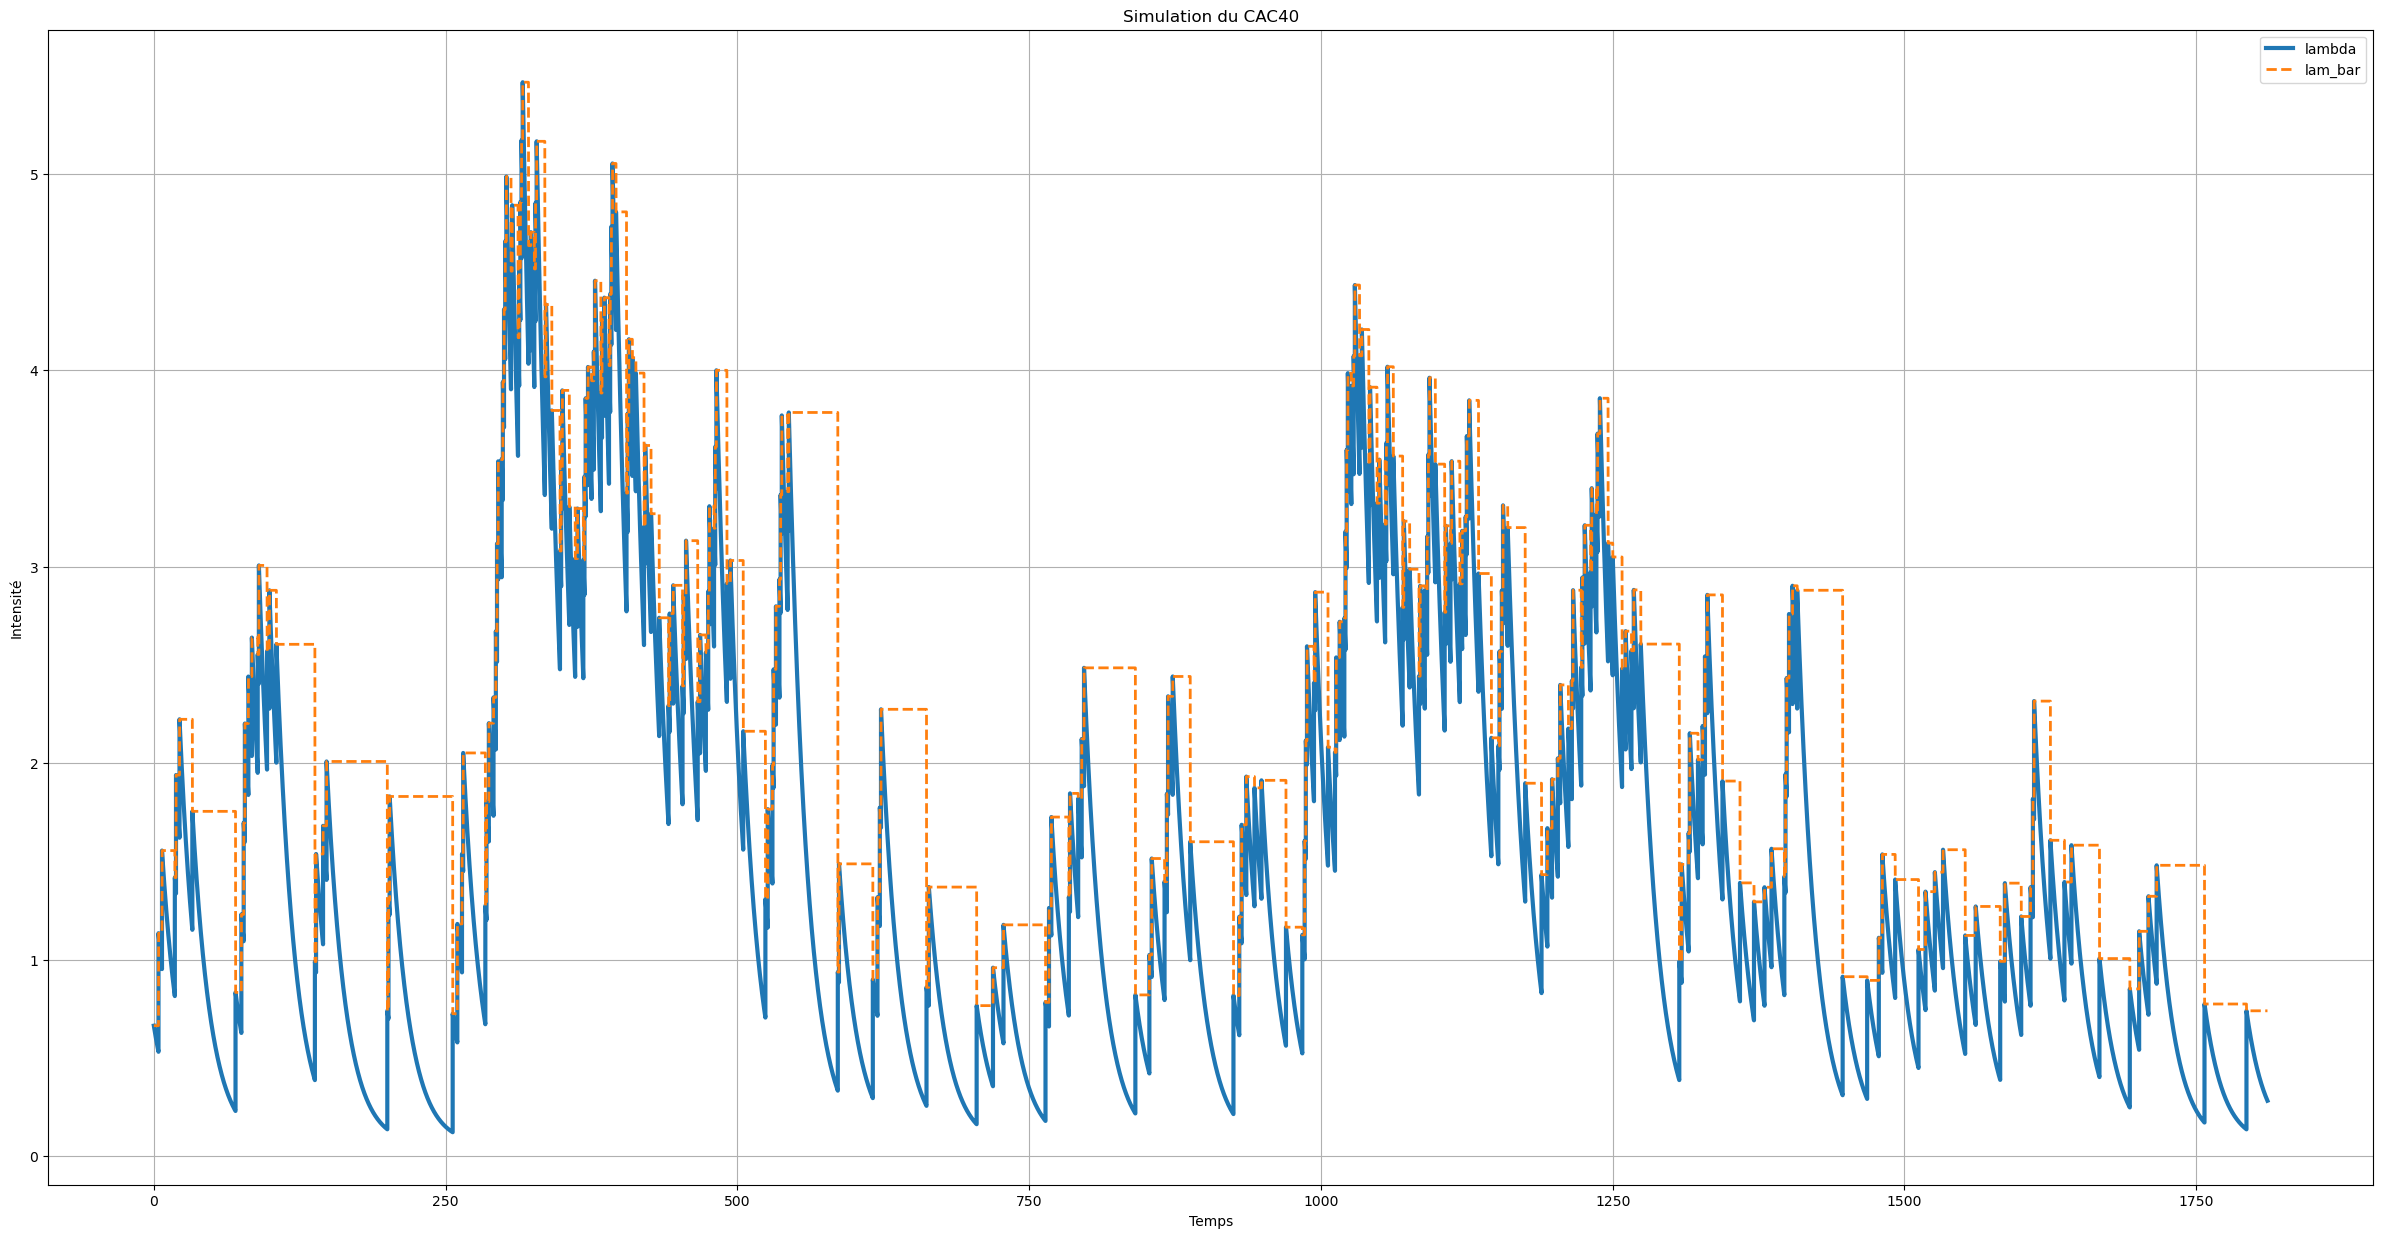

In [20]:
nb_points=int(TH_CAC40[-1])*100
print("mu:",mu)
print("alpha:",alpha)
print("beta:",beta)
# On veut tracer la fonction d'intensité du processus de Hawkes, lamdba(t):
times=np.linspace(TH_CAC40[0],TH_CAC40[-1],nb_points)


l=[] ; sup_l = []; brk2 = []
j=0; count =0
for i in times:
    count +=1
    if j < len(TH_CAC40)-1:   # Pour s'assurer qu'on ne dépasse pas le nombre de temps de sauts du processus de Hawkes
        if i < TH_CAC40[0]:   # Tant qu'on a pas eu le 1er saut de temps accepté
            temp = mu   # Notre fonction lamdba reste constante et vaut mu en attendant d'avoir un premier évènement et donc un premier saut de temps
        elif i < TH_CAC40[j]: # Sinon tant qu'on est entre deux temps de sauts tau on calcule notre lamdba
            temp = mu + np.sum(alpha * np.exp(-beta * (i - np.array(TH_CAC40[:j]))))
        else :          # Dans le cas où on a dépassé un temps de sauts
            brk2.append(count-1) # On stocke l'indice de temps de sauts pour s'en servir pour l'affichage du sup de lambda donc de lamdba_bar
            j=j+1                # On passe à temps de sauts suivants
            temp = mu + np.sum(alpha * np.exp(-beta * (i - np.array(TH_CAC40[:j]))))
        l.append(temp)
    else: #Une fois qu'on a dépassé le dernier temps de sauts, on prend la dernière valeur du temps de sauts et on calcule lambda jusqu'à la fin de la fenêtre de temps
        temp = mu + np.sum(alpha * np.exp(-beta * (i - np.array(TH_CAC40[:-1]))))
        l.append(temp)


        
# On veut tracer le sup de la fonction lambda(t) précédente, lamdba_bar:
b=0
j=0
i=0
brk=sorted(brk2)     # On la trie par ordre croissant

for j in range(len(brk)): # On parcourt la liste des temps tau acceptés comme refusé
    while i < brk[j]:     # Tant qu'on est entre deux temps de saut on garde le même sup
        sup_l.append(max(l[b:brk[j]])) # On prend le max de lamdba sur l'intervalle du dernier temps de saut au prochain 
        i+=1
    b=brk[j]    # On actualise le dernier temps de saut, tau
while i < len(l): # Quand on a dépassé le dernier temps de saut tau, on boucle jusqu'au dernier point de lamdba
    sup_l.append(max(l[brk[-1]:len(l)-1])) # On calcule le sup sur ce dernier intervalle
    i+=1



fig = plt.figure(figsize = (30, 15))

lt.plot(times, l,label="lambda", linewidth=3)                        # On affiche la fonction d'intensité du Processus de Hawkes lamdba en bleu
plt.plot(times, sup_l, linestyle='--', label="lam_bar",linewidth=2)   # On affiche le sup de lamdba ci-dessus en pointillé orange
plt.xlabel('Temps')
plt.ylabel('Intensité')
plt.title('Simulation du CAC40')
plt.legend()
plt.grid(True)
plt.show()

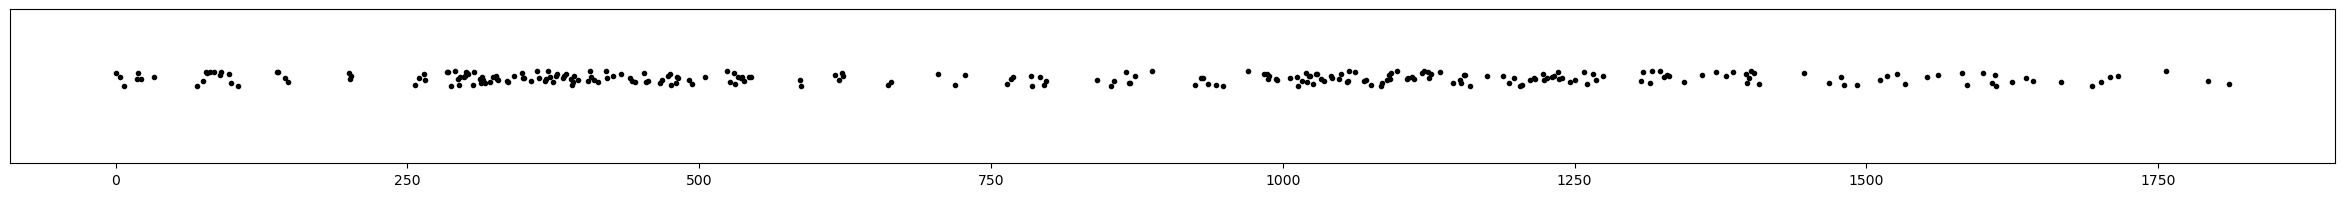

In [21]:
plt.figure(figsize=(30,2))
plt.ylim([-5, 5])
plt.yticks([])
_ = plt.plot(TH_CAC40, np.random.rand(len(TH_CAC40)), 'k.')

In [30]:
uv = UVHP()
uv.fit(np.array(TH_1an))
mu, alpha, beta = uv.get_params()

N_approx = mu * TH_1an[-1] / (1 - alpha)
print("---------CAC 40 sur une période d'1 an----------------")
print("Nombre de temps de sauts approximé:",N_approx)
print("Nombre de temps de sauts réel :", len(TH_1an))
print("mu:",mu)
print("alpha:",alpha)
print("beta:",beta)


uv = UVHP()
uv.fit(np.array(TH_2an))
mu, alpha, beta = uv.get_params()

N_approx = mu * TH_2an[-1] / (1 - alpha)
print(" ")
print("---------CAC 40 sur une période de 2 ans---------------")
print("Nombre de temps de sauts approximé:",N_approx)
print("Nombre de temps de sauts réel :", len(TH_2an))
print("mu:",mu)
print("alpha:",alpha)
print("beta:",beta)


uv = UVHP()
uv.fit(np.array(TH_5an))
mu, alpha, beta = uv.get_params()

N_approx = mu * TH_5an[-1] / (1 - alpha)
print(" ")
print("---------CAC 40 sur une période de 5 ans---------------")
print("Nombre de temps de sauts approximé:",N_approx)
print("Nombre de temps de sauts réel :", len(TH_5an))
print("mu:",mu)
print("alpha:",alpha)
print("beta:",beta)

---------CAC 40 sur une période d'1 an----------------
Nombre de temps de sauts approximé: 27.015116007167972
Nombre de temps de sauts réel : 27
mu: 0.07661663164556066
alpha: 0.004541098381499796
beta: 0.016706392263375256
 
---------CAC 40 sur une période de 2 ans---------------
Nombre de temps de sauts approximé: 87.65426178204874
Nombre de temps de sauts réel : 87
mu: 0.08295438938523247
alpha: 0.3261762287252356
beta: 0.06373638751156924
 
---------CAC 40 sur une période de 5 ans---------------
Nombre de temps de sauts approximé: 273.08121908825973
Nombre de temps de sauts réel : 271
mu: 0.05972845698194342
alpha: 0.6038971996849787
beta: 0.06212029475394526


## ***BIBLIOGRAPHIE :***
- *Thinning Algorithms for Simulating Point Processes*, Yuanda Chen
- *Poisson processes and application to reliability theory and actuarial science*, Mélisande ALBERT
- *Cours sur les processus de poissons*, Université de Rennes, Jérémy Bettinger & Simon Viel
- *Processus de Poisson homogènes - Application à des données génomiques*, Mélisande ALBERT & Nicolas OGOREK
